In [1]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt 
import seaborn as sns 
color = sns.color_palette()

df = pd.read_csv("/kaggle/input/e-commerce-website-logs/E-commerce Website Logs.csv")
df.head(5)

/tmp/ipykernel_19/1202959869.py:8: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/e-commerce-website-logs/E-commerce Website Logs.csv")


,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,TCP,1.10.195.126,20100,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,TCP,1.1.217.211,20500,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,TCP,1.115.198.107,90100,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,TCP,1.121.152.143,100300,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,TCP,1.123.135.213,270200,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [2]:
# Analisis exploratorio de los datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172838 entries, 0 to 172837
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   accessed_date     172838 non-null  object 
 1   duration_(secs)   172838 non-null  int64  
 2   network_protocol  172838 non-null  object 
 3   ip                172838 non-null  object 
 4   bytes             172838 non-null  int64  
 5   accessed_Ffom     172838 non-null  object 
 6   age               99457 non-null   object 
 7   gender            172838 non-null  object 
 8   country           172838 non-null  object 
 9   membership        172838 non-null  object 
 10  language          172838 non-null  object 
 11  sales             172838 non-null  float64
 12  returned          172838 non-null  object 
 13  returned_amount   172838 non-null  float64
 14  pay_method        172838 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 19.8+ MB


In [4]:
df.shape

(172838, 15)

In [5]:
df1 = df.drop(columns = ['ip', 'bytes', 'network_protocol'])
df1.head()

,accessed_date,duration_(secs),accessed_Ffom,age,gender,country,membership,language,sales,returned,returned_amount,pay_method
0,2017-03-14 17:43:57.172,2533,Chrome,28,Female,CA,Normal,English,261.9600,No,0.0,Credit Card
1,2017-03-14 17:43:57.172,4034,Mozilla Firefox,21,Male,AR,Normal,English,731.9400,No,0.0,Debit Card
2,2017-03-14 17:43:26.135,1525,Mozilla Firefox,20,Male,PL,Normal,English,14.6200,No,0.0,Cash
3,2017-03-14 17:43:26.135,4572,Mozilla Firefox,66,Female,IN,Normal,Spanish,957.5775,No,0.0,Credit Card
4,2017-03-14 18:17:09.005,3652,Mozilla Firefox,53,Female,KR,Normal,Spanish,22.3680,No,0.0,Cash


In [6]:
df1.describe()

,duration_(secs),sales,returned_amount
count,172838.000000,172838.000000,172838.000000
mean,3248.031827,411.346449,74.012092
std,1010.872270,785.537868,364.446435
min,1500.000000,0.000000,0.000000
25%,2371.000000,5.230000,0.000000
50%,3246.000000,46.920000,0.000000
75%,4124.000000,600.160000,0.000000
max,5000.000000,11199.968000,22638.480000


In [7]:
# Vemos posibles valores faltantes
df1.isnull().sum()

accessed_date          0
duration_(secs)        0
accessed_Ffom          0
age                73381
gender                 0
country                0
membership             0
language               0
sales                  0
returned               0
returned_amount        0
pay_method             0
dtype: int64

In [8]:
# Edad presenta un gran numero de datos faltantes
missing_proportions = df1.isnull().mean()
missing_proportions

accessed_date      0.000000
duration_(secs)    0.000000
accessed_Ffom      0.000000
age                0.424565
gender             0.000000
country            0.000000
membership         0.000000
language           0.000000
sales              0.000000
returned           0.000000
returned_amount    0.000000
pay_method         0.000000
dtype: float64

In [9]:
# Casi un 45% de los datos de edad son nulos. Denota el primer problema a solucionar
# Se podria utilizar algun metodo para imputar las edades faltantes pero en mi caso opto directamente por descartarlas ya que la muestra sigue siendo grande. 

In [10]:
df1.dropna(subset=['age'], inplace=True)

In [11]:
missing_proportions = df1.isnull().mean()
missing_proportions

accessed_date      0.0
duration_(secs)    0.0
accessed_Ffom      0.0
age                0.0
gender             0.0
country            0.0
membership         0.0
language           0.0
sales              0.0
returned           0.0
returned_amount    0.0
pay_method         0.0
dtype: float64

In [12]:
# Observamos algunas variables antes de proceder a graficar

In [13]:
df1['accessed_Ffom'].value_counts()

accessed_Ffom
Android App        21989
Chrome             16259
Mozilla Firefox    15306
Others             15296
IOS App            12435
Safari              9479
Microsoft Edge      8610
SafFRi                83
Name: count, dtype: int64

In [14]:
# Safari y SafFRi (creo son el mismo navegador) procedo a corregirlo.

In [15]:
# Reemplazar 'SafFRi' con 'Safari'
df1['accessed_Ffom'].replace('SafFRi', 'Safari', inplace=True)
df1['accessed_Ffom'].value_counts()

accessed_Ffom
Android App        21989
Chrome             16259
Mozilla Firefox    15306
Others             15296
IOS App            12435
Safari              9562
Microsoft Edge      8610
Name: count, dtype: int64

In [16]:
df1['gender'].value_counts()

gender
Female     50682
Male       34032
Unknown    14743
Name: count, dtype: int64

In [17]:
df1['membership'].value_counts()

membership
Premium          54847
Normal           29867
Not Logged In    14743
Name: count, dtype: int64

In [18]:
df1['pay_method'].value_counts()

pay_method
Cash           41815
Credit Card    30518
Debit Card     15823
Others         11301
Name: count, dtype: int64

In [19]:
# GRAFICOS

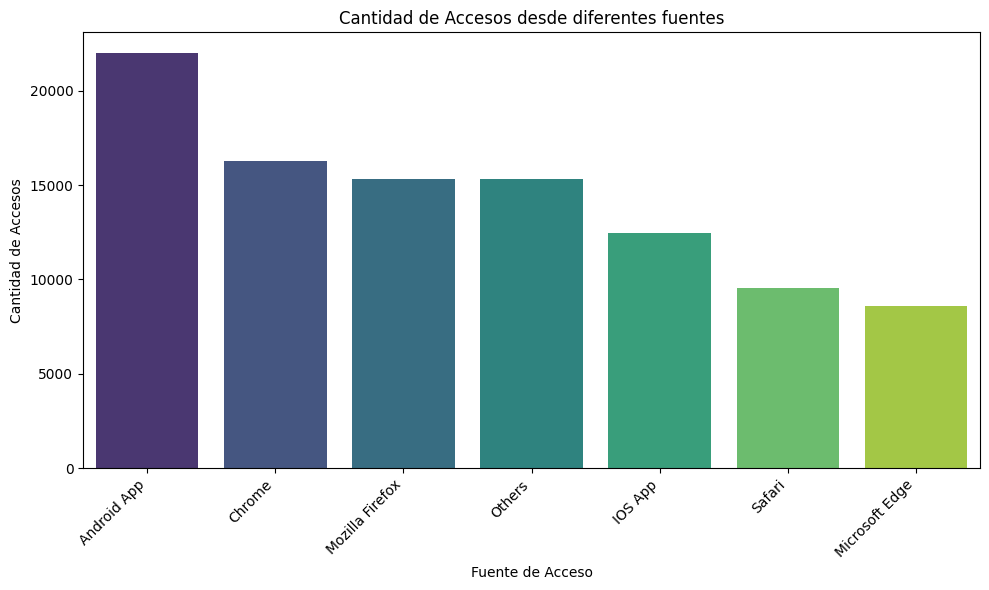

In [20]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df1, x='accessed_Ffom', palette='viridis', order=df1['accessed_Ffom'].value_counts().index)

plt.xlabel('Fuente de Acceso')
plt.ylabel('Cantidad de Accesos')
plt.title('Cantidad de Accesos desde diferentes fuentes')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [21]:
# La plataforma mas utilizada para ingresar es la aplicacion de Android, 
# donde le siguen Google Chrome y por ultimo Mozilla.

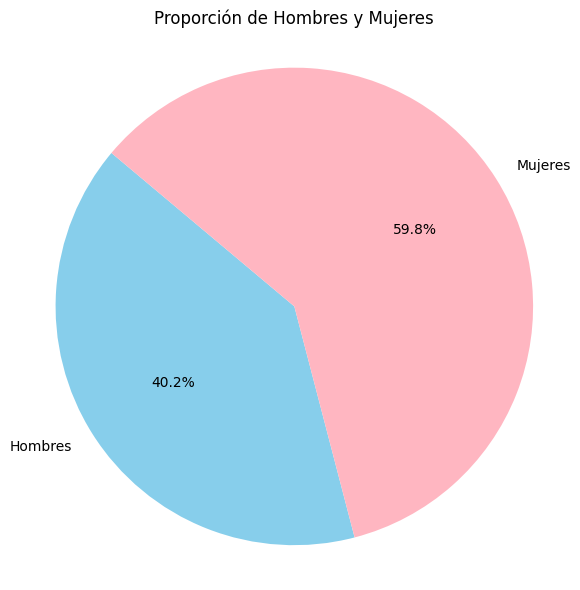

In [22]:
cantidad_hombres = (df1['gender'] == 'Male').sum()
cantidad_mujeres = (df1['gender'] == 'Female').sum()

etiquetas = ['Hombres', 'Mujeres']
valores = [cantidad_hombres, cantidad_mujeres]

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', colors=['skyblue', 'lightpink'], startangle=140)

plt.title('Proporción de Hombres y Mujeres')

plt.axis('equal')  
plt.tight_layout()
plt.show()

In [23]:
# Hay un predominio notorio en cuanto al genero femenino por encima del masculino. 

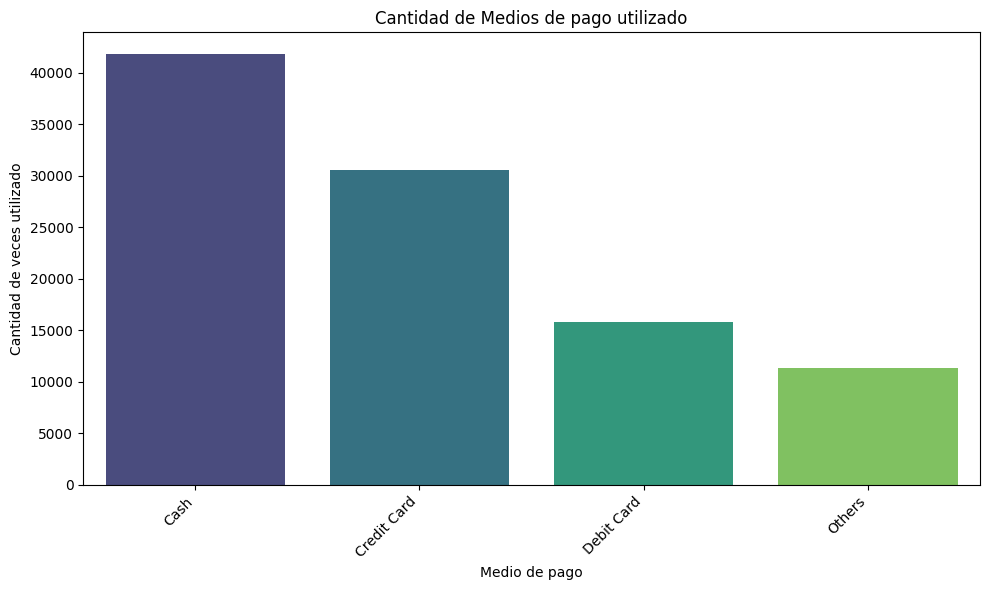

In [24]:
plt.figure(figsize=(10, 6))

sns.countplot(data=df1, x='pay_method', palette='viridis', order=df1['pay_method'].value_counts().index)

plt.xlabel('Medio de pago')
plt.ylabel('Cantidad de veces utilizado')
plt.title('Cantidad de Medios de pago utilizado')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
# El efectivo se erige como la opcion mas utilizada para el pago. Le sigue la tarjeta de credito.
# Completando el top 3 se ubica la opcion de pago con debito.

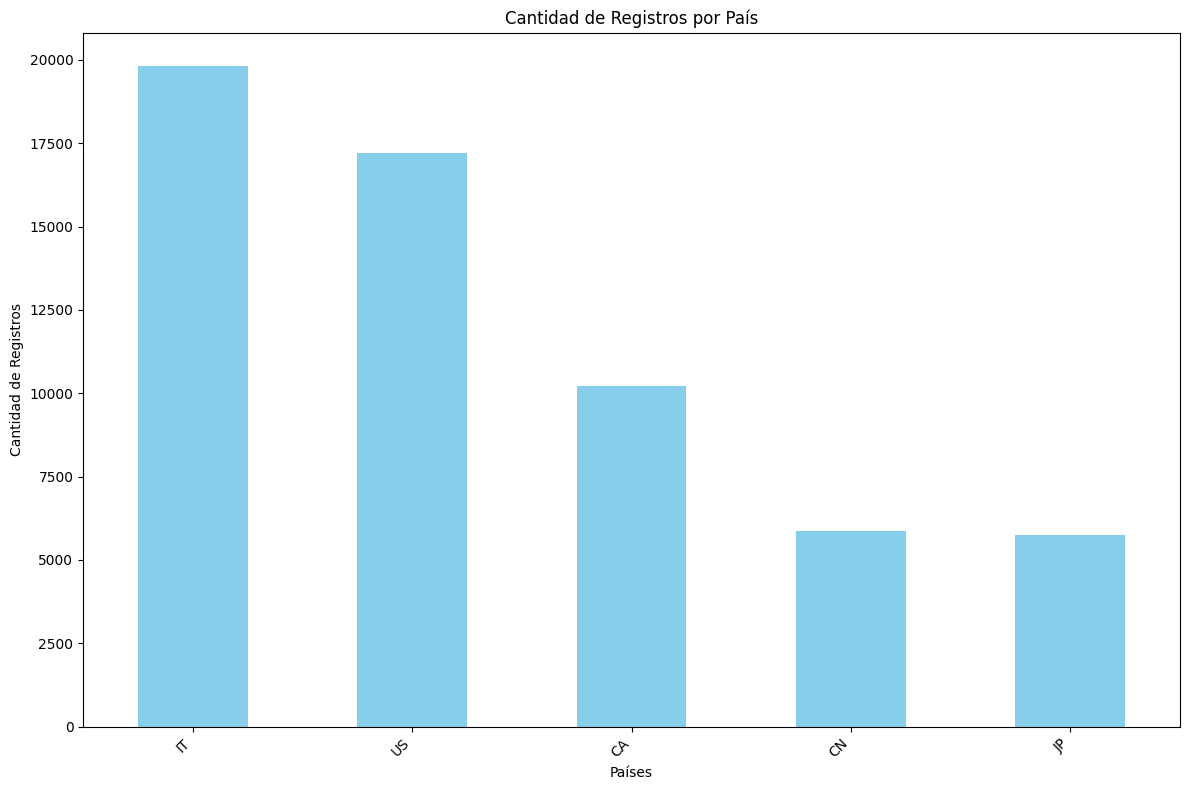

In [26]:
paises = df1['country'].value_counts().head(5)

plt.figure(figsize=(12, 8))
paises.plot(kind='bar', color='skyblue')

plt.xlabel('Países')
plt.ylabel('Cantidad de Registros')
plt.title('Cantidad de Registros por País')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [27]:
# Los cinco paises que mayor cantidad de registros poseen en la plataforma. 

<Figure size 1000x600 with 0 Axes>

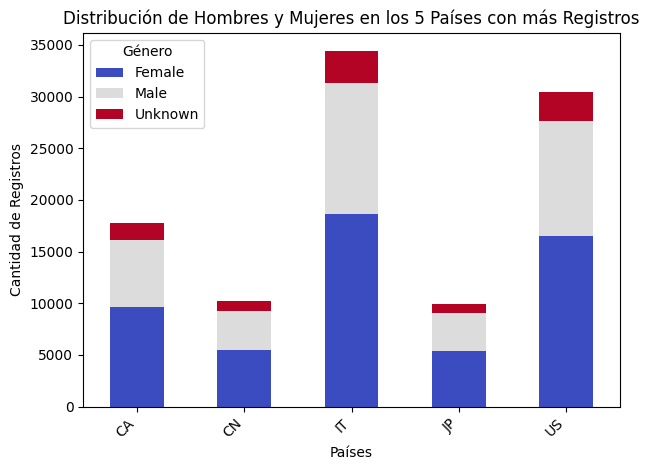

In [28]:
top_5_countries = df['country'].value_counts().head(5).index.tolist()

df_top_5_countries = df[df['country'].isin(top_5_countries)]

hombres_mujeres_por_pais = df_top_5_countries.groupby(['country', 'gender']).size().unstack(fill_value=0)

plt.figure(figsize=(10, 6))
hombres_mujeres_por_pais.plot(kind='bar', stacked=True, cmap='coolwarm')

plt.xlabel('Países')
plt.ylabel('Cantidad de Registros')
plt.title('Distribución de Hombres y Mujeres en los 5 Países con más Registros')
plt.legend(title='Género')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [29]:
# Los 5 paises con mas registros en base al genero de cada persona.
# Oportunidad para realizar marketing en base a estos datos.

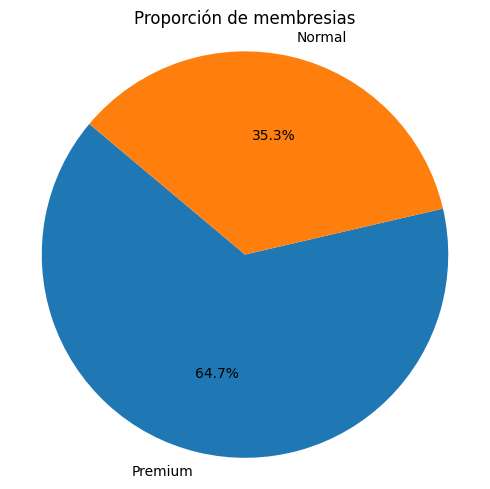

In [30]:
cantidad_premium = (df1['membership'] == 'Premium').sum()
cantidad_normal = (df1['membership'] == 'Normal').sum()

etiquetas = ['Premium', 'Normal']
valores = [cantidad_premium, cantidad_normal]

plt.figure(figsize=(5, 5))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140)

plt.title('Proporción de membresias')

plt.axis('equal')  
plt.tight_layout()
plt.show()

In [31]:
# Existe un claro predominio de las personas que tienen una suscripcion premium frente a la normal.